In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Generating a synthetic dataset 
X = np.sort(5 * np.random.rand(100, 1), axis=0)  # 100 samples of a single feature
y = np.sin(X).ravel() + 0.1 * np.random.randn(100)  # y = sin(X) + noise


In [4]:
# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Fitting SVR model with RBF kernel
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_rbf.fit(X_train, y_train)


SVR(C=100, gamma=0.1)

In [6]:
# Making predictions
y_pred = svr_rbf.predict(X_test)


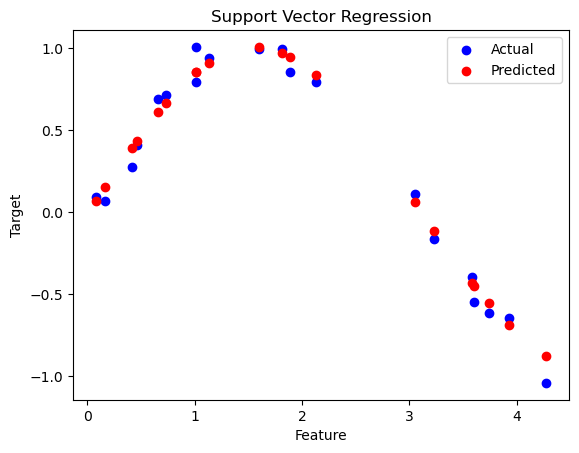

In [10]:
# Plotting the results
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.title('Support Vector Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()



In [8]:

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [9]:

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.0059577750399396326
R-squared: 0.9852061328888484


## Tuning SVR Hyperparameters

In [12]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid to search for best parameters
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10], 'epsilon': [0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5)

# Fit the grid search model
grid_search.fit(X_train, y_train)

# Best parameters from grid search
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'C': 1, 'epsilon': 0.1, 'gamma': 1}


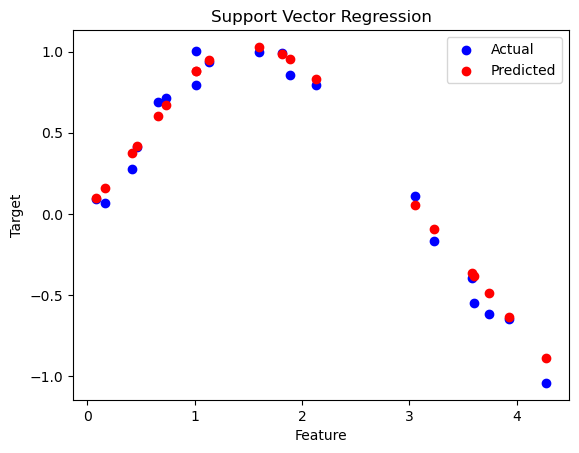

Mean Squared Error: 0.007209020942007606
R-squared: 0.9820991398462319


In [13]:
# Fitting SVR model with RBF kernel
svr_rbf = SVR(kernel='rbf', C=1, gamma=1, epsilon=0.1)
svr_rbf.fit(X_train, y_train)

# Making predictions
y_pred = svr_rbf.predict(X_test)

# Plotting the results
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.title('Support Vector Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)